In [17]:
from matplotlib import pyplot as plt 
import numpy as np
plt.rcParams['text.usetex'] = False

In [18]:
dt = 0.1;
b = 1e-4
g = 9.8
numSteps = 1200

F = np.array([[1, 0, dt, 0],[0, 1, 0, dt],[0,0,1-b,0],[0, 0, 0, 1-b]])
G = np.array([[0],[0],[0],[dt]])
U = np.array([[-g]])
H = np.array([[1,0,0,0],[0, 1, 0, 0]])

Q = 1e-1*np.eye(4)
R = 500*np.eye(2)

In [19]:
xTrue = np.zeros((numSteps,4,1))
xTrue[0,:,:] = np.array([[0],[0],[300],[600]])

xRand = np.zeros((numSteps,4,1))
xRand[0,:,:] = np.array([[0],[0],[300],[600]])

y = np.zeros((numSteps,2,1))
y[0,:,:] = H@xTrue[0,:,:] + R@(np.random.rand(2,1) - .5*np.ones((2,1)))*2

for j in range(0,numSteps-1):
    xTrue[j+1,:,:] = F@xTrue[j,:,:] + G*U
    xRand[j+1,:,:] = xTrue[j+1,:,:] + .001*xTrue[j+1,:,:]**2 + Q@(np.random.rand(4,1) - .5*np.ones((4,1)))*2
    y[j,:,:] = H@xTrue[j,:,:] + R@(np.random.rand(2,1) - .5*np.ones((2,1)))*2

y[-1,:,:] =  H@xTrue[-1,:,:] + R@(np.random.rand(2,1) - .5*np.ones((2,1)))*2

In [36]:
#plt.figure(figsize=(16, 8))
#plt.plot(y[:,0,0],'.-',markersize=3,linewidth=.5)
#plt.plot(xTrue[:,0,0],linewidth=1)
#plt.xlabel('x coordinate',fontsize=16)
#plt.ylabel('y coordinate',fontsize=16)
#plt.show()

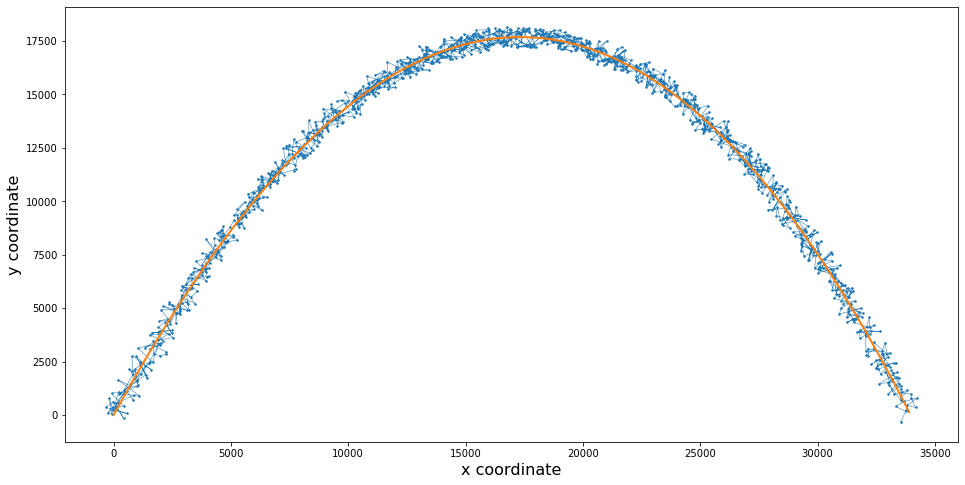

In [37]:
plt.figure(figsize=(16, 8))
plt.plot(y[:,0,0],y[:,1,0],'.-',markersize=3,linewidth=.5)
plt.plot(xTrue[:,0,0],xTrue[:,1,0],linewidth=2)
plt.xlabel('x coordinate',fontsize=16)
plt.ylabel('y coordinate',fontsize=16)
plt.show()

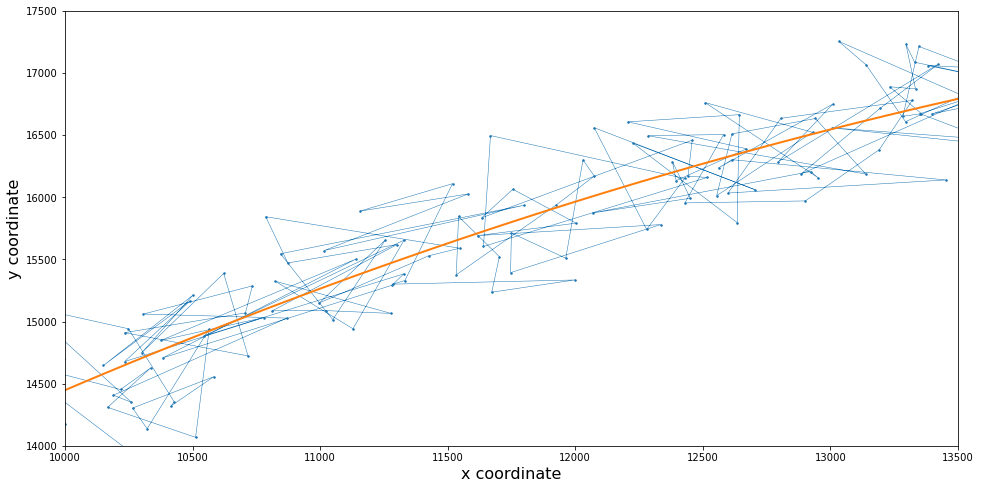

In [38]:
plt.figure(figsize=(16, 8))
plt.plot(y[:,0,0],y[:,1,0],'.-',markersize=3,linewidth=.5)
plt.plot(xTrue[:,0,0],xTrue[:,1,0],linewidth=2)
plt.xlabel('x coordinate',fontsize=16)
plt.ylabel('y coordinate',fontsize=16)
plt.xlim(10000,13500)
plt.ylim(14000,17500)
plt.show()

In [23]:
xP = np.array([[0],[0],[0],[0]])
xK = np.zeros((numSteps,4,1))

xP[0:1,0] = y[0,0:1,0]
P = 200*Q;

for j in range(0,numSteps):
    K = ((H@P).T)@np.linalg.inv(H@P@H.T + R)
    xK[j,:,:] = xP + K@(y[j,:,:].reshape(2,1) - H@xP)
    P = F@((np.eye(4) - K@H)@P)@F.T + Q
    xP = F@xK[j,:,:]+ G@U


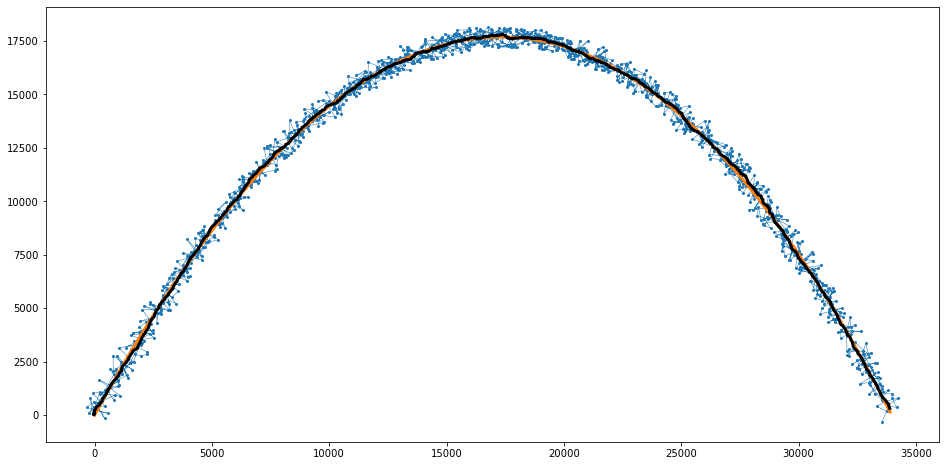

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(y[:,0,0],y[:,1,0],'.-',markersize=4,linewidth=.5)
plt.plot(xTrue[:,0,0],xTrue[:,1,0],linewidth=3)
plt.plot(xK[0:-1,0,0],xK[0:-1,1,0],'--',linewidth=3,color='black')

plt.show()

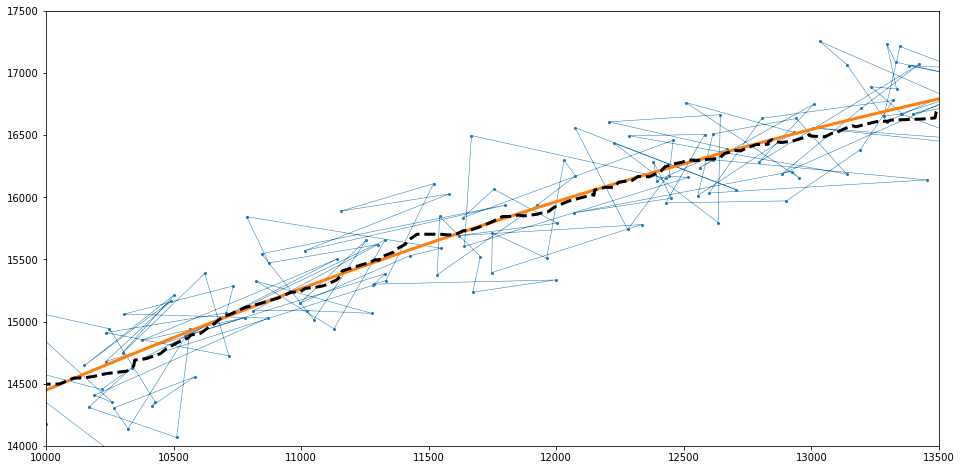

In [35]:
plt.figure(figsize=(16, 8))
plt.plot(y[:,0,0],y[:,1,0],'.-',markersize=4,linewidth=.5)
plt.plot(xTrue[:,0,0],xTrue[:,1,0],linewidth=3)
plt.plot(xK[0:-1,0,0],xK[0:-1,1,0],'--',linewidth=3,color='black')
plt.xlim(10000,13500)
plt.ylim(14000,17500)
plt.show()